In [2]:
# DataFrame merge
# key를 중심하고 두 df를 결합, join사용하는 방법과 동일
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

df1 = DataFrame({'key':['b','b','a','c','a','a','b'], 'data1':range(7)}) # 'c'는 왜 출력 안 됨? - 빠짐
print(df1)
df2 = DataFrame({'key':['a','b','d'], 'data2':range(3)}) # 'd'가 빠짐
print(df2)
# 양쪽에 없는 키는 생략 - 키를 지정하지 않은 경우에 양쪽에 일치하는 데이터 중심
print(pd.merge(df1,df2, how='inner')) # 일치하는 데이터(출력)

pd.merge(df1, df2, on='key')
pd.merge(df1, df2, left_on = 'key', right_on='key') # 키를 명시적으로 지정
pd.merge(df1, df2, how='outer') # 합집합

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2
  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0


,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [3]:
# python은 계층적 키를 지원 = R에서 melt하고 비슷함
# np.arange(6)의 결과값은 ndarray
data = DataFrame(np.arange(6).reshape(2,3), index=pd.Index(['Ohio', 
                'Colorado'], name = 'state'), # 계층적 인덱싱
                columns = pd.Index(['one', 'two', 'three'], name = 'number'))
print(data)
result = data.stack() # 데이터의 축회전을 해서 결과를 생성 ( 열이 행으로 변함 )
print("분리")
print(result)
print(result.unstack()) # 행 데이터를 열 데이터로 변형

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
분리
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32
number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [10]:
# duplicated : 파이썬은 중복하지 않는다.
data = DataFrame({'k1': ['one'] *3 + ['two'] *4, # 문자열 곱하기를 지원
                 'k2' : [1,1,2,3,3,4,4]})
print(data)
print(data.duplicated()) 
data.drop_duplicates()
data['v1'] = range(7) # np.arange - arange를 리스트로 돌린다.
data.drop_duplicates(['k1'])
data.drop_duplicates(['k1', 'k2'], keep='last')

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool


,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


In [13]:
# 값 치환하기

data = Series([1., -999., 2., -999., -1000., 3.])
print(data)
print(data.replace(-999, np.nan))
print(data.replace([-999, -1000], np.nan))
print(data.replace([-999, -1000], [np.nan, 0]))
print(data.replace({-999:np.nan, -1000:0}))

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64
0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [15]:
# 축 색인 이름 변경하기
 
data = DataFrame(np.arange(12).reshape((3,4)),
                index=['Ohio', 'Colorado', 'New York'],
                columns=['one', 'two', 'three', 'four'])
# 원본을 수정하지 않는다.
print(data.index.map(str.upper))
print(data)
# 대입이 벌어진 것
data.index=data.index.map(str.upper)
data.rename(index=str.title, columns=str.upper)
# 일부 수정
data.rename(index={'Ohio':'Indiana'}, columns={'three':'peekaboo'})
# inplace : 그자리에서 변경
_=data.rename(index={'OHIO':'INDIANA'}, inplace=True)
print(data)


Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11
          one  two  three  four
INDIANA     0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


In [18]:
# 개별화와 양자화 ( 구간값으로 나눔 )
# 범주화 ->  cut, qcut의 차이는 균등으로 정규분포로 나눔
ages = [20,22,25,27,21,24,37,31,61,45,41,32]
bins = [18,25,35,60,100]
  #     0    1   2   3

cats = pd.cut(ages, bins)
print(cats)
print(cats.codes) # 범주가 속한 레벨값
print(cats.categories) # 범주값이 출력
pd.value_counts(cats) # 범주별로 데이터 개수를 출력

pd.cut(ages, [18,26,36,61,100], right=False) # 포함범위
group_names=['yuouth', 'youthAdult', 'MiddleAged', 'Senier']
pd.cut(ages, bins, labels=group_names)
# 균등분포
data=np.random.rand(20)
pd.cut(data, 4, precision=2)

data = np.random.randn(1000)
cats = pd.qcut(data, 4)
print(cats)
pd.value_counts(cats)
pd.qcut(data, [0,0.1, 0.5, 0.9, 1])

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
[0 0 0 1 0 0 2 1 3 2 2 1]
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')
[(-3.569, -0.672], (0.766, 4.021], (-3.569, -0.672], (-0.672, 0.0173], (0.0173, 0.766], ..., (0.766, 4.021], (0.766, 4.021], (0.766, 4.021], (0.766, 4.021], (0.0173, 0.766]]
Length: 1000
Categories (4, interval[float64]): [(-3.569, -0.672] < (-0.672, 0.0173] < (0.0173, 0.766] < (0.766, 4.021]]


[(-3.569, -1.297], (0.0173, 1.34], (-3.569, -1.297], (-1.297, 0.0173], (0.0173, 1.34], ..., (1.34, 4.021], (0.0173, 1.34], (0.0173, 1.34], (0.0173, 1.34], (0.0173, 1.34]]
Length: 1000
Categories (4, interval[float64]): [(-3.569, -1.297] < (-1.297, 0.0173] < (0.0173, 1.34] < (1.34, 4.021]]

In [21]:
# 이상치 제거(이상한 수치 제거)
np.random.seed(12345)
data = DataFrame(np.random.randn(100,4))
data.describe() # describe = R의 summary
col= data[3]
col[np.abs(col)>3]
data[(np.abs(data)>3).any(1)] # 행의 값중에 절대값이 3보다 큰 값이 하나라도 있으면 출력
data[np.abs(data)>3] = np.sign(data)*3 # 데이터 +3, -3을 입력하라
data.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,-0.142766,0.099733,0.060532,-0.085898
std,0.995497,0.918984,1.050212,1.070339
min,-2.557934,-1.860761,-2.644409,-2.420294
25%,-0.788723,-0.571684,-0.699515,-0.773203
50%,-0.256996,0.111051,0.064969,-0.230874
75%,0.637665,0.711930,0.730487,0.624688
max,2.212303,2.613999,3.000000,3.000000


In [23]:
# 순열
import itertools
mylist = [1,2,3]
# 가능한 조합수
mypermuatation = itertools.permutations(mylist)
for i in mypermuatation:
    print(i)
# 순서만 변경
sampler = np.random.permutation(mylist)
print(sampler)
# 다차원인 경우 첫번째 인덱스를 중심하고 랜덤하게 순서만 변경
num = np.arange(20).reshape(5,4)
print(num)
np.random.permutation(num)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)
[3 2 1]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


array([[ 0,  1,  2,  3],
       [16, 17, 18, 19],
       [ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [ 8,  9, 10, 11]])

In [24]:
df = DataFrame(np.arange(20).reshape(5,4))

sampler=np.random.permutation(5)
print("내용",sampler) # [1 2 0 3 4] - 랜덤으로 출력됨
print(df.take(sampler))

내용 [1 2 0 3 4]
    0   1   2   3
1   4   5   6   7
2   8   9  10  11
0   0   1   2   3
3  12  13  14  15
4  16  17  18  19


In [25]:
# dummy 변수
df = DataFrame({'key':['b','b','a','c','a','b'], 'data1':range(6)})
pd.get_dummies(df['key'])

dummies = pd.get_dummies(df['key'], prefix='key')
print(dummies)
df_with_dummy=df[['data1']].join(dummies)
print(df_with_dummy)

   key_a  key_b  key_c
0      0      1      0
1      0      1      0
2      1      0      0
3      0      0      1
4      1      0      0
5      0      1      0
   data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0


In [26]:
# 데이터프레임에 전치행렬 => 행과 열을 변경
messy = pd.DataFrame({'First' : ['서울', '원산', '대전'],
                      'Last' : ['부산', '평양', '광주'],
                      'Treatment A' : [np.nan, 16, 3],
                      'Treatment B' : [2, 11, 1]})
messy

,First,Last,Treatment A,Treatment B
0,서울,부산,NaN,2
1,원산,평양,16.0,11
2,대전,광주,3.0,1


In [28]:
messy.T # 전치행렬 : 행과 열이 바뀜

,0,1,2
First,서울,원산,대전
Last,부산,평양,광주
Treatment A,NaN,16,3
Treatment B,2,11,1


In [30]:
tidy = pd.melt(messy,
              id_vars=['First','Last'],
              var_name='treatment',
              value_name='result')
tidy

,First,Last,treatment,result
0,서울,부산,Treatment A,NaN
1,원산,평양,Treatment A,16.0
2,대전,광주,Treatment A,3.0
3,서울,부산,Treatment B,2.0
4,원산,평양,Treatment B,11.0
5,대전,광주,Treatment B,1.0


In [31]:
# 문제 : olive.csv데이터를 로딩한 후 다음을 해결하시오
# 문제1) 첫번째 컬럼의 이름을 ID_area로 지정하시오
# 문제2) regions의 값들을 중복하지 않고 몇개의 범주인지 확인하시오
# 문제3) area도 위와 같이 처리하시오

# 문제5) 처음 컬럼(ID_area)에 들어온 이상한 숫자를 제거하시오
# 문제6) 산성관련성분인 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic,', 'linolenic', 'arachidic',
#        'eicosenoic'의 컬럼만 추려서 별도의 sub데이터 프레임(변수이름=dfsub)을 생성하시오
# 문제7) dfsub의 데이터를 모두 0으로 시작하는 소수점으로 나타내시오
# 문제8) palmitic산과 linolenic산의 분포도를 시각화하시오
# 문제9) palmitic히스토그램을 간단하게 시각화하시오
# 문제10) xacids=['oleic', 'linolenic', 'eicosenoic'],
#         yacids=['stearic', 'archidic']을 가지고 각기
#         xacids-yacids의 scatter plot를 그리기(6개)
# 문제11) groupby를 활용하여 region을 기준으로 묶어서 region_groupby객체로 생성
# 문제12) region_groupby에 describe() 메소드 적용하여 출력해 보시오

In [33]:
# 문제 : olive.csv데이터를 로딩한 후 다음을 해결하시오
olive = pd.read_csv("C:\work\R\olive.csv", index_col=0)
olive.head()
olive.describe()

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.699301,4.599650,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,0.859968,2.356687,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,1.000000,1.000000,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,1.000000,3.000000,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,3.000000,7.000000,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,3.000000,9.000000,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


In [37]:
# 문제1) 첫번째 컬럼의 이름을 ID_area로 지정하시오
df.rename(columns={"region":"ID_area"}, inplace = True) #False이면 아무변화 없음
print(df)

                  ID_area  area  palmitic  palmitoleic  stearic  oleic  \
1.North-Apulia          1     1      1075           75      226   7823   
2.North-Apulia          1     1      1088           73      224   7709   
3.North-Apulia          1     1       911           54      246   8113   
4.North-Apulia          1     1       966           57      240   7952   
5.North-Apulia          1     1      1051           67      259   7771   
6.North-Apulia          1     1       911           49      268   7924   
7.North-Apulia          1     1       922           66      264   7990   
8.North-Apulia          1     1      1100           61      235   7728   
9.North-Apulia          1     1      1082           60      239   7745   
10.North-Apulia         1     1      1037           55      213   7944   
11.North-Apulia         1     1      1051           35      219   7978   
12.North-Apulia         1     1      1036           59      235   7868   
13.North-Apulia         1     1      1

In [51]:
# 문제2) regions의 값들을 중복하지 않고 몇개의 범주인지 확인하시오
olive = pd.read_csv("C:\work\R\olive.csv", index_col=0)
df = DataFrame(olive)
print(df)
print(df.duplicated())
df.drop_duplicates()
df['region'] = range(572)
df.drop_duplicates(['region'], keep='first')

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]




                  region  area  palmitic  palmitoleic  stearic  oleic  \
1.North-Apulia         1     1      1075           75      226   7823   
2.North-Apulia         1     1      1088           73      224   7709   
3.North-Apulia         1     1       911           54      246   8113   
4.North-Apulia         1     1       966           57      240   7952   
5.North-Apulia         1     1      1051           67      259   7771   
6.North-Apulia         1     1       911           49      268   7924   
7.North-Apulia         1     1       922           66      264   7990   
8.North-Apulia         1     1      1100           61      235   7728   
9.North-Apulia         1     1      1082           60      239   7745   
10.North-Apulia        1     1      1037           55      213   7944   
11.North-Apulia        1     1      1051           35      219   7978   
12.North-Apulia        1     1      1036           59      235   7868   
13.North-Apulia        1     1      1074           

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
1.North-Apulia,0,1,1075,75,226,7823,672,36,60,29
2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
3.North-Apulia,2,1,911,54,246,8113,549,31,63,29
4.North-Apulia,3,1,966,57,240,7952,619,50,78,35
5.North-Apulia,4,1,1051,67,259,7771,672,50,80,46
6.North-Apulia,5,1,911,49,268,7924,678,51,70,44
7.North-Apulia,6,1,922,66,264,7990,618,49,56,29
8.North-Apulia,7,1,1100,61,235,7728,734,39,64,35
9.North-Apulia,8,1,1082,60,239,7745,709,46,83,33
10.North-Apulia,9,1,1037,55,213,7944,633,26,52,30


In [55]:
df = df[['region', 'area']]
print(df.region.value_counts())

571    1
187    1
193    1
192    1
191    1
190    1
189    1
188    1
186    1
195    1
185    1
184    1
183    1
182    1
181    1
180    1
194    1
196    1
178    1
205    1
211    1
210    1
209    1
208    1
207    1
206    1
204    1
197    1
203    1
202    1
      ..
371    1
370    1
369    1
368    1
366    1
391    1
365    1
364    1
363    1
362    1
361    1
360    1
374    1
375    1
376    1
377    1
378    1
379    1
380    1
381    1
382    1
383    1
384    1
385    1
386    1
387    1
388    1
389    1
390    1
0      1
Name: region, Length: 572, dtype: int64


In [56]:
print(df.area.value_counts())

3    206
5     65
2     56
9     51
8     50
7     50
4     36
6     33
1     25
Name: area, dtype: int64


In [59]:
# 문제5) 처음 컬럼(ID_area)에 들어온 이상한 숫자를 제거하시오
 #np.random.seed(12345)
 #data = DataFrame(np.random.randn(100,4))
 #data.describe() # describe = R의 summary
 #col= data[3]
 #col[np.abs(col)>3]
 #data[(np.abs(data)>3).any(1)] # 행의 값중에 절대값이 3보다 큰 값이 하나라도 있으면 출력
 #data[np.abs(data)>3] = np.sign(data)*3 # 데이터 +3, -3을 입력하라
 #data.describe()
df.rename(columns={"region":"ID_area"}, inplace = True) #False이면 아무변화 없음
print(df)

                  ID_area  area
1.North-Apulia          0     1
2.North-Apulia          1     1
3.North-Apulia          2     1
4.North-Apulia          3     1
5.North-Apulia          4     1
6.North-Apulia          5     1
7.North-Apulia          6     1
8.North-Apulia          7     1
9.North-Apulia          8     1
10.North-Apulia         9     1
11.North-Apulia        10     1
12.North-Apulia        11     1
13.North-Apulia        12     1
14.North-Apulia        13     1
15.North-Apulia        14     1
16.North-Apulia        15     1
17.North-Apulia        16     1
18.North-Apulia        17     1
19.North-Apulia        18     1
20.North-Apulia        19     1
21.North-Apulia        20     1
22.North-Apulia        21     1
23.North-Apulia        22     1
24.North-Apulia        23     1
25.North-Apulia        24     1
26.Calabria            25     2
27.Calabria            26     2
28.Calabria            27     2
29.Calabria            28     2
30.Calabria            29     2
...     

In [64]:
# 문제6) 산성관련성분인 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic,', 'linolenic', 'arachidic',
#        'eicosenoic'의 컬럼만 추려서 별도의 sub데이터 프레임(변수이름=dfsub)을 생성하시오
olive = pd.read_csv("C:\work\R\olive.csv", index_col=0)
df = DataFrame(olive)
print(df)

data = DataFrame(np.arange(12).reshape((3,4)),
                index=['Ohio', 'Colorado', 'New York'],
                columns=['one', 'two', 'three', 'four'])

dfsub = DataFrame(np.arange(21).reshpae((7,3)),
                 index=)

                  region  area  palmitic  palmitoleic  stearic  oleic  \
1.North-Apulia         1     1      1075           75      226   7823   
2.North-Apulia         1     1      1088           73      224   7709   
3.North-Apulia         1     1       911           54      246   8113   
4.North-Apulia         1     1       966           57      240   7952   
5.North-Apulia         1     1      1051           67      259   7771   
6.North-Apulia         1     1       911           49      268   7924   
7.North-Apulia         1     1       922           66      264   7990   
8.North-Apulia         1     1      1100           61      235   7728   
9.North-Apulia         1     1      1082           60      239   7745   
10.North-Apulia        1     1      1037           55      213   7944   
11.North-Apulia        1     1      1051           35      219   7978   
12.North-Apulia        1     1      1036           59      235   7868   
13.North-Apulia        1     1      1074           

In [ ]:
# 문제 : olive.csv데이터를 로딩한 후 다음을 해결하시오
# 문제1) 첫번째 컬럼의 이름을 ID_area로 지정하시오
# 문제2) regions의 값들을 중복하지 않고 몇개의 범주인지 확인하시오
# 문제3) area도 위와 같이 처리하시오

# 문제5) 처음 컬럼(ID_area)에 들어온 이상한 숫자를 제거하시오
# 문제6) 산성관련성분인 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic,', 'linolenic', 'arachidic',
#        'eicosenoic'의 컬럼만 추려서 별도의 sub데이터 프레임(변수이름=dfsub)을 생성하시오
# 문제7) dfsub의 데이터를 모두 0으로 시작하는 소수점으로 나타내시오
# 문제8) palmitic산과 linolenic산의 분포도를 시각화하시오
# 문제9) palmitic히스토그램을 간단하게 시각화하시오
# 문제10) xacids=['oleic', 'linolenic', 'eicosenoic'],
#         yacids=['stearic', 'archidic']을 가지고 각기
#         xacids-yacids의 scatter plot를 그리기(6개)
# 문제11) groupby를 활용하여 region을 기준으로 묶어서 region_groupby객체로 생성
# 문제12) region_groupby에 describe() 메소드 적용하여 출력해 보시오

In [65]:
%matplotlib inline
path = "./olive.csv"
df=pd.read_csv(path)
df.head(5)
df.dtypes
df.describe()
df.rename(columns={df.columns[0]:'ID_area'}, inplace=True)
df.columns
df.head()

# 유니크한 값 확인
print('regions\t', df.region.unique())
print('areas\t', df.area.unique())

# 행렬로 크로스 테이블 생성
pd.crosstab(df.area, df.region)

# 데이터 탐색후 처음 컬럼의 숫자 제거
df.head()
df["ID_area"]=df["ID_area"].apply(lambda x: x.split('.')[1])
df.head()
df["ID_area"].unique()
# 산성 관련 성분 서브데이터 프레임
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic',
         'linolenic', 'arachidic', 'eicosenoic']
dfsub = df[acidlist]
dfsub.head()
# lambda 함수를 이용하여 데이터 100으로 나누기
dfsub=df[acidlist].apply(lambda x: x/100.0)
dfsub.head()
df[acidlist]=dfsub
df.head()
# 두 산의 분포도 그리기
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(df["palmitic"], df["linolenic"])
axis = fig.gca()
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')
# 팔마틱산 히스토그램
plt.hist(df["palmitic"])
# region을 기준으로 한 groupby 객체 생성과 데이터
region_groupby = df.groupby(['region'])
region_groupby
region_groupby.head()
dfrd=region_groupby.describe()
dfrd.head(10)
region_groupby.mean()
region_groupby.apply(lambda x : x.mean())
region_groupby.std()


regions	 [1 2 3]
areas	 [1 2 3 4 5 6 9 7 8]


,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46


In [66]:
%matplotlib inline
path = "./olive.csv"
df=pd.read_csv(path)
df.head(5)
df.dtypes
df.describe()
df.rename(columns={df.columns[0]:'ID_area'}, inplace=True)
df.columns
df.head()

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [67]:
# 유니크한 값 확인
print('regions\t', df.region.unique())
print('areas\t', df.area.unique())

regions	 [1 2 3]
areas	 [1 2 3 4 5 6 9 7 8]


In [68]:
# 행렬로 크로스 테이블 생성
pd.crosstab(df.area, df.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [69]:
# 데이터 탐색후 처음 컬럼의 숫자 제거
df.head()
df["ID_area"]=df["ID_area"].apply(lambda x: x.split('.')[1])
df.head()
df["ID_area"].unique()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

In [70]:
# 산성 관련 성분 서브데이터 프레임
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic',
         'linolenic', 'arachidic', 'eicosenoic']
dfsub = df[acidlist]
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46


In [72]:
# lambda 함수를 이용하여 데이터 100으로 나누기(백분율)
dfsub=df[acidlist].apply(lambda x: x/100.0)
dfsub.head()
df[acidlist]=dfsub
df.head()

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,0.977273,0.068182,0.205455,7.111818,0.610909,0.032727,0.054545,0.026364
1,North-Apulia,1,1,0.989091,0.066364,0.203636,7.008182,0.710000,0.028182,0.055455,0.026364
2,North-Apulia,1,1,0.828182,0.049091,0.223636,7.375455,0.499091,0.028182,0.057273,0.026364
3,North-Apulia,1,1,0.878182,0.051818,0.218182,7.229091,0.562727,0.045455,0.070909,0.031818
4,North-Apulia,1,1,0.955455,0.060909,0.235455,7.064545,0.610909,0.045455,0.072727,0.041818


Text(0,0.5,'linolenic')

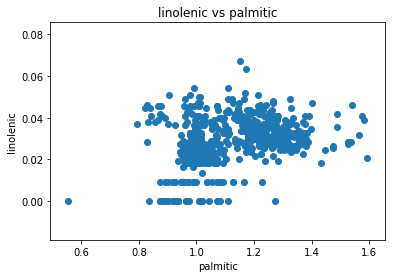

In [79]:
# 두 산의 분포도 그리기
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(df["palmitic"], df["linolenic"])
axis = fig.gca()
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')

(array([  1.,   0.,  11.,  71., 188.,  79., 131.,  73.,   9.,   9.]),
 array([0.55454545, 0.65845455, 0.76236364, 0.86627273, 0.97018182,
        1.07409091, 1.178     , 1.28190909, 1.38581818, 1.48972727,
        1.59363636]),
 <a list of 10 Patch objects>)

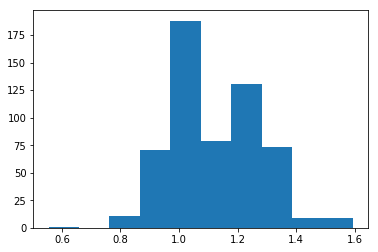

In [95]:
# 팔마틱산 히스토그램
plt.hist(df["palmitic"])

In [83]:
# region을 기준으로 한 groupby 객체 생성과 데이터
region_groupby = df.groupby(['region'])
region_groupby
region_groupby.head()
dfrd=region_groupby.describe()
dfrd.head(10)
region_groupby.mean()
region_groupby.apply(lambda x : x.mean())
region_groupby.std()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,0.139032,0.046112,0.036246,0.313766,0.191521,0.007248,0.010149,0.007629
2,0.475023,0.036737,0.012592,0.016033,0.128980,0.097485,0.004895,0.010802,0.000676
3,0.820542,0.075058,0.024035,0.035415,0.149832,0.130111,0.015351,0.026690,0.000663


In [85]:
region_groupby = df.groupby(['region'])
region_groupby
region_groupby.head()
dfrd=region_groupby.describe()
dfrd.head(10)

arachidic                                                              \
           count      mean       std       min       25%       50%       75%   
region                                                                         
1          323.0  0.057380  0.010149  0.029091  0.050909  0.056364  0.062727   
2           98.0  0.066521  0.010802  0.040909  0.060000  0.065455  0.073636   
3          151.0  0.034160  0.026690  0.000000  0.009091  0.034545  0.054091   

                   area              ...    palmitoleic           stearic  \
             max  count      mean    ...            75%       max   count   
region                               ...                                    
1       0.092727  323.0  2.783282    ...       0.168182  0.254545   323.0   
2       0.095455   98.0  5.336735    ...       0.094545  0.122727    98.0   
3       0.090909  151.0  8.006623    ...       0.090909  0.163636   151.0   

                                                                              
            mean       std       min       25%       50%       75%       max  
region                                                                        
1       0.207976  0.036246  0.138182  0.183182  0.202727  0.226818  0.340909  
2       0.205622  0.016033  0.180909  0.192727  0.201818  0.217727  0.247273  
3       0.209819  0.035415  0.154545  0.181818  0.209091  0.227273  0.318182  

[3 rows x 72 columns]

In [98]:
# pivot_ table
df = pd.read_excel("C:\work\R\sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [100]:
df["Status"] = df["Status"].astype("category")
# Accessor object for categorial properties of the Series values.
df["Status"].cat.set_categories(["won", "pending", "presented", "declined"]
                               ,inplace=True)
# 데이터 재구성
pd.pivot_table(df,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",737550.0,35000.0,1.000000
Herman LLC,141962.0,65000.0,2.000000
Jerde-Hilpert,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",307599.0,7000.0,3.000000
Keeling LLC,688981.0,100000.0,5.000000
Kiehn-Spinka,146832.0,65000.0,2.000000
Koepp Ltd,729833.0,35000.0,2.000000
Kulas Inc,218895.0,25000.0,1.500000


In [101]:
pd.pivot_table(df,index=["Name"],columns=["Manager"] )

Account                      Price  \
Manager                      Debra Henley Fred Anderson Debra Henley   
Name                                                                   
Barton LLC                       740150.0           NaN      35000.0   
Fritsch, Russel and Anderson     737550.0           NaN      35000.0   
Herman LLC                            NaN      141962.0          NaN   
Jerde-Hilpert                    412290.0           NaN       5000.0   
Kassulke, Ondricka and Metz           NaN      307599.0          NaN   
Keeling LLC                           NaN      688981.0          NaN   
Kiehn-Spinka                     146832.0           NaN      65000.0   
Koepp Ltd                             NaN      729833.0          NaN   
Kulas Inc                        218895.0           NaN      25000.0   
Purdy-Kunde                           NaN      163416.0          NaN   
Stokes LLC                            NaN      239344.0          NaN   
Trantow-Barrows                  714466.0           NaN      15000.0   

                                               Quantity                
Manager                      Fred Anderson Debra Henley Fred Anderson  
Name                                                                   
Barton LLC                             NaN     1.000000           NaN  
Fritsch, Russel and Anderson           NaN     1.000000           NaN  
Herman LLC                         65000.0          NaN           2.0  
Jerde-Hilpert                          NaN     2.000000           NaN  
Kassulke, Ondricka and Metz         7000.0          NaN           3.0  
Keeling LLC                       100000.0          NaN           5.0  
Kiehn-Spinka                           NaN     2.000000           NaN  
Koepp Ltd                          35000.0          NaN           2.0  
Kulas Inc                              NaN     1.500000           NaN  
Purdy-Kunde                        30000.0          NaN           1.0  
Stokes LLC                          7500.0          NaN           1.0  
Trantow-Barrows                        NaN     1.333333           NaN

In [103]:
pd.pivot_table(df,index=["Name"], columns=["Manager"], values=["Price"])

Price              
Manager                      Debra Henley Fred Anderson
Name                                                   
Barton LLC                        35000.0           NaN
Fritsch, Russel and Anderson      35000.0           NaN
Herman LLC                            NaN       65000.0
Jerde-Hilpert                      5000.0           NaN
Kassulke, Ondricka and Metz           NaN        7000.0
Keeling LLC                           NaN      100000.0
Kiehn-Spinka                      65000.0           NaN
Koepp Ltd                             NaN       35000.0
Kulas Inc                         25000.0           NaN
Purdy-Kunde                           NaN       30000.0
Stokes LLC                            NaN        7500.0
Trantow-Barrows                   15000.0           NaN

In [106]:
pd.pivot_table(df,index=["Manager", "Rep"], values = ["Price"], aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [107]:
pd.pivot_table(df,index=["Manager", "Rep"], values = ["Price"], 
               aggfunc=[np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

In [109]:
pd.pivot_table(df,index=["Manager","Rep"], values=["Price"],
              columns=["Product"],aggfunc=[np.sum], fill_value = 0)
# fill_value = 0 , NaN 값 0으로 수정

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [112]:
pd.pivot_table(df,index=["Manager","Rep"], values=["Price", "Quantity"],
              columns=["Product"],aggfunc=[np.sum,np.mean], fill_value = 0)

sum                                        \
                              Price                              Quantity   
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                           mean              \
                                                          Price               
Product                     Maintenance Monitor Software    CPU Maintenance   
Manager       Rep                                                             
Debra Henley  Craig Booker            2       0        1  32500        5000   
              Daniel Hilton           0       0        1  52500           0   
              John Smith              2       0        0  35000        5000   
Fred Anderson Cedric Moss             1       0        1  47500        5000   
              Wendy Yule              3       2        0  82500        7000   

                                                                           \
                                             Quantity                       
Product                     Monitor Software      CPU Maintenance Monitor   
Manager       Rep                                                           
Debra Henley  Craig Booker        0    10000      1.0           2       0   
              Daniel Hilton       0    10000      2.0           0       0   
              John Smith          0        0      1.0           2       0   
Fred Anderson Cedric Moss         0    10000      1.5           1       0   
              Wendy Yule       5000        0      3.5           3       2   

                                      
                                      
Product                     Software  
Manager       Rep                     
Debra Henley  Craig Booker         1  
              Daniel Hilton        1  
              John Smith           0  
Fred Anderson Cedric Moss          1  
              Wendy Yule           0

In [113]:
pd.pivot_table(df,index=["Manager","Rep"], values=["Price", "Quantity"],
              columns=["Product"],aggfunc=[np.sum,np.mean], fill_value = 0, margins=True)

sum                                       \
                              Price                                        
Product                         CPU Maintenance Monitor Software     All   
Manager       Rep                                                          
Debra Henley  Craig Booker    65000        5000       0    10000   80000   
              Daniel Hilton  105000           0       0    10000  115000   
              John Smith      35000        5000       0        0   40000   
Fred Anderson Cedric Moss     95000        5000       0    10000  110000   
              Wendy Yule     165000        7000    5000        0  177000   
All                          465000       22000    5000    30000  522000   

                                                                        mean  \
                            Quantity                                   Price   
Product                          CPU Maintenance Monitor Software All    CPU   
Manager       Rep                                                              
Debra Henley  Craig Booker         2           2       0        1   5  32500   
              Daniel Hilton        4           0       0        1   5  52500   
              John Smith           1           2       0        0   3  35000   
Fred Anderson Cedric Moss          3           1       0        1   5  47500   
              Wendy Yule           7           3       2        0  12  82500   
All                               17           8       2        3  30  51666   

                                                                        \
                                                                         
Product                     Maintenance Monitor Software           All   
Manager       Rep                                                        
Debra Henley  Craig Booker         5000       0    10000  20000.000000   
              Daniel Hilton           0       0    10000  38333.333333   
              John Smith           5000       0        0  20000.000000   
Fred Anderson Cedric Moss          5000       0    10000  27500.000000   
              Wendy Yule           7000    5000        0  44250.000000   
All                                5500    5000    10000  30705.882353   

                                                                              
                             Quantity                                         
Product                           CPU Maintenance Monitor Software       All  
Manager       Rep                                                             
Debra Henley  Craig Booker   1.000000           2       0        1  1.250000  
              Daniel Hilton  2.000000           0       0        1  1.666667  
              John Smith     1.000000           2       0        0  1.500000  
Fred Anderson Cedric Moss    1.500000           1       0        1  1.250000  
              Wendy Yule     3.500000           3       2        0  3.000000  
All                          1.888889           2       2        1  1.764706

In [114]:
pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],
              values=["Quantity","Price"],
              aggfunc={"Quantity":len,"Price":np.sum},fill_value=0)

Price                              Quantity  \
Product                     CPU Maintenance Monitor Software      CPU   
Manager       Status                                                    
Debra Henley  presented   30000           0       0    20000        1   
              pending     40000       10000       0        0        1   
              declined    70000           0       0        0        2   
              won         65000           0       0        0        1   
Fred Anderson presented   30000           0    5000    10000        1   
              pending         0        5000       0        0        0   
              declined    65000           0       0        0        1   
              won        165000        7000       0        0        2   

                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  presented           0       0        2  
              pending             2       0        0  
              declined            0       0        0  
              won                 0       0        0  
Fred Anderson presented           0       1        1  
              pending             1       0        0  
              declined            0       0        0  
              won                 1       0        0

In [119]:
table = pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],
                      values=["Quantity","Price"],
                      aggfunc={"Quantity":len,"Price":[np.sum, np.mean]},
                      fill_value=0)
table

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  presented  30000           0       0    10000   30000   
              pending    40000        5000       0        0   40000   
              declined   35000           0       0        0   70000   
              won        65000           0       0        0   65000   
Fred Anderson presented  30000           0    5000    10000   30000   
              pending        0        5000       0        0       0   
              declined   65000           0       0        0   65000   
              won        82500        7000       0        0  165000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  presented           0       0    20000        1           0   
              pending         10000       0        0        1           2   
              declined            0       0        0        2           0   
              won                 0       0        0        1           0   
Fred Anderson presented           0    5000    10000        1           0   
              pending          5000       0        0        0           1   
              declined            0       0        0        1           0   
              won              7000       0        0        2           1   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  presented       0        2  
              pending         0        0  
              declined        0        0  
              won             0        0  
Fred Anderson presented       1        1  
              pending         0        0  
              declined        0        0  
              won             0        0

In [118]:
table.query('Manager == ["Debra Henley"]')

Price                                                  \
                         mean                                 sum               
Product                   CPU Maintenance Monitor Software    CPU Maintenance   
Manager      Status                                                             
Debra Henley presented  30000           0       0    10000  30000           0   
             pending    40000        5000       0        0  40000       10000   
             declined   35000           0       0        0  70000           0   
             won        65000           0       0        0  65000           0   

                                        Quantity                               
                                             len                               
Product                Monitor Software      CPU Maintenance Monitor Software  
Manager      Status                                                            
Debra Henley presented       0    20000        1           0       0        2  
             pending         0        0        1           2       0        0  
             declined        0        0        2           0       0        0  
             won             0        0        1           0       0        0

In [121]:
table.query('Status == ["Pending", "won"]')

Price                                                   \
                       mean                                  sum               
Product                 CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                           
Debra Henley  won     65000           0       0        0   65000           0   
Fred Anderson won     82500        7000       0        0  165000        7000   

                                      Quantity                               
                                           len                               
Product              Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                         
Debra Henley  won          0        0        1           0       0        0  
Fred Anderson won          0        0        2           1       0        0

In [122]:
# pivot
from collections import OrderedDict
table = OrderedDict((
    ("Item",  ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType', ['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD', ['1$', '2$', '3$', '4$']),
    ('KOREA', ['1원', '2원', '3원', '4원'])
))
d = pd.DataFrame(table)
print(d)
p = d.pivot(index='Item', columns='CType', values='USD')
print(p)

    Item   CType USD KOREA
0  Item0    Gold  1$    1원
1  Item0  Bronze  2$    2원
2  Item1    Gold  3$    3원
3  Item1  Silver  4$    4원
CType Bronze Gold Silver
Item                    
Item0     2$   1$    NaN
Item1    NaN   3$     4$


In [123]:
# 데이터 indexing 방법의 비교, pivoting이 간단하다.
print(d[(d.Item == 'Item0') & (d.CType == 'Gold')].USD.values)
print(p[p.index == 'Item0'].Gold.values)

['1$']
['1$']


In [124]:
p = d.pivot(index='Item', columns = 'CType')
print(p)

         USD              KOREA            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0     2$   1$    NaN     2원   1원    NaN
Item1    NaN   3$     4$    NaN   3원     4원


In [ ]:
# 문제)
# dataset.csv를 로딩하고 resident열과 position열을 출력하시오
# describe로 확인할 때 숫자 데이터인 것이 나타나지 않는 원인을 확인하시오
# 각 열의 데이터 타입을 확인하시오
# price와 age의 데이터 타입이 숫자가 아니면 숫자 데이터로 변경하시오


In [187]:
%matplotlib inline
path = "./dataset.csv"
df = pd.read_csv(path)
print(df)

    resident     gender                job              age          position  \
0          1          1                  1              26                  2   
1          2          1                  2              54                  5   
2                     1                  2              41                  4   
3          4          2                                 45                  4   
4          5          1                  3              62                  5   
5          3          1                  2              57                      
6          2          2                  1              36                  3   
7          5          1                  2                                  3   
8                     1                  1              56                  5   
9          2          1                  2              37                  3   
10         5          2                                 29                  2   
11         3          1     

In [183]:
df.head(5)

,resident,gender,job,age,position,price,survey
0,1,1,1,26,2,5.10,1
1,2,1,2,54,5,4.20,2
2,,1,2,41,4,4.70,4
3,4,2,,45,4,3.50,2
4,5,1,3,62,5,5.00,1


In [189]:
# 공백을 제거하고 재할당
df.columns=df.columns.str.strip()
df.columns.tolist()
print(df.describe())

           gender      survey
count  300.000000  300.000000
mean     1.420000    2.656667
std      0.545826    0.837333
min      0.000000    1.000000
25%      1.000000    2.000000
50%      1.000000    3.000000
75%      2.000000    3.000000
max      5.000000    5.000000


In [185]:
df2 = df[["resident", 'position']]
df2

,resident,position
0,1,2
1,2,5
2,,4
3,4,4
4,5,5
5,3,
6,2,3
7,5,3
8,,5
9,2,3


In [166]:
df.shape

(300, 7)

In [182]:
# describe로 확인할 때 숫자 데이터인 것이 나타나지 않는 원인을 확인하시오
df.describe()

,gender,survey
count,300.000000,300.000000
mean,1.420000,2.656667
std,0.545826,0.837333
min,0.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,3.000000
max,5.000000,5.000000


In [192]:
# 공백을 제거하고 재할당
df.columns=df.columns.str.strip()
print(df.columns.tolist())
print(df.describe())

['resident', 'gender', 'job', 'age', 'position', 'price', 'survey']
           gender      survey
count  300.000000  300.000000
mean     1.420000    2.656667
std      0.545826    0.837333
min      0.000000    1.000000
25%      1.000000    2.000000
50%      1.000000    3.000000
75%      2.000000    3.000000
max      5.000000    5.000000


In [212]:
print(df)

    resident  gender       job       age  position            price  survey
0          1       1         1       26          2            5.10        1
1          2       1         2       54          5            4.20        2
2                  1         2       41          4            4.70        4
3          4       2                 45          4            3.50        2
4          5       1         3       62          5            5.00        1
5          3       1         2       57                       5.40        2
6          2       2         1       36          3            4.10        4
7          5       1         2                   3          675.00        4
8                  1         1       56          5            4.40        3
9          2       1         2       37          3            4.90        3
10         5       2                 29          2            2.30        5
11         3       1         3       35          2            4.20        3
12         1

In [194]:
print("데이터 타입확인:", df.dtypes)

데이터 타입확인: resident    object
gender       int64
job         object
age         object
position    object
price       object
survey       int64
dtype: object


In [219]:
# price와 age의 데이터 타입이 숫자가 아니면 숫자 데이터로 변경하시오

df[['price', 'age']] = df[['price', 'age']].apply(pd.to_numeric)
df.apply(pd.to_numeric, errors='ignore')
df.dtypes


NameError: name 'numeric' is not defined

In [221]:
df[['price', 'age']] = df[['price', 'age']].apply(pd.to_numeric)

ValueError: ('Unable to parse string "               " at position 27', 'occurred at index price')

In [242]:
df[['price', 'age']] = df[['price', 'age']].apply(pd.to_numeric, errors='coerce')
print("데이터 타입확인:", df.dtypes)

데이터 타입확인: resident     object
gender        int64
job          object
age         float64
position     object
price       float64
survey        int64
dtype: object


In [230]:
# object는 string 으로 변경화 숫자형으로 변경
df['age']=df['age'].astype(str).str.strip()
df["age"].fillna(0,inplace = True)
df["age"]=pd.to_numeric(df['age'].astype(float))
df["price"].fillna('',inplace = True)
df["price"]=pd.to_numeric(df['price'].astype(str))
df["price"]=pd.to_numeric(df['price'].astype(float))
print("데이터 타입확인:", df.dtypes)

데이터 타입확인: resident     object
gender        int64
job          object
age         float64
position     object
price       float64
survey        int64
dtype: object


In [233]:
df['age']=df['age'].astype(str).str.strip()
df["age"].fillna('', inplace = True)
df["age"]=pd.to_numeric(df['age'].astype(float), errors = 'ignore')

print("데이터 타입확인:", df.dtypes)

데이터 타입확인: resident     object
gender        int64
job          object
age         float64
position     object
price       float64
survey        int64
dtype: object


In [235]:
df['price']=df['price'].astype(str).str.strip()
df["price"].fillna('', inplace = True)
df["price"]=pd.to_numeric(df['price'].astype(float), errors = 'ignore')

print("데이터 타입확인:", df.dtypes)

데이터 타입확인: resident     object
gender        int64
job          object
age         float64
position     object
price       float64
survey        int64
dtype: object


In [254]:
df['price']=df['price'].astype(str).str.strip()
df["price"].fillna('', inplace = True)
df["price"]
df["price"] =pd.to_numeric(df['price'],errors = 'ignore')
df["price"] = df["price"].astype(float)
print("데이터 타입확인:", df.dtypes)

데이터 타입확인: resident     object
gender        int64
job          object
age         float64
position     object
price       float64
survey        int64
dtype: object


In [245]:
print(df['resident'])

0        1
1        2
2         
3        4
4        5
5        3
6        2
7        5
8         
9        2
10       5
11       3
12       1
13       2
14        
15       1
16       3
17       2
18       1
19       1
20       1
21       1
22       2
23       1
24       1
25       2
26       1
27       1
28       2
29       1
      ... 
270      1
271      5
272      1
273      5
274      5
275      1
276      2
277       
278      5
279      2
280      1
281      4
282      2
283      1
284      4
285      2
286      1
287      1
288      1
289      1
290      5
291      1
292      2
293      1
294      2
295      1
296      3
297      4
298      3
299      1
Name: resident, Length: 300, dtype: object


In [248]:
df.isnull().values.sum()

31

In [249]:
df.isnull().any()

resident    False
gender      False
job         False
age          True
position    False
price       False
survey      False
dtype: bool

In [250]:
df.isnull().any().any()

True

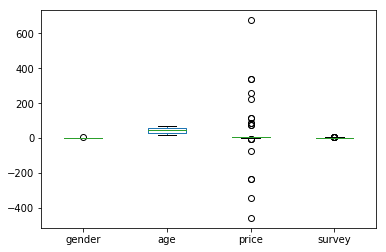

In [255]:
df.plot.box()